# Perform Exploratory Data Analysis on 'Indian Premiere League'
● Performing ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’

● As a sports analysts, finding out the most successful teams, players and factors contributing win or loss of a team.

● Suggestion of teams or players a company should endorse for its products.


## Author: Indrajit Nandi


In [2]:
#Importing libraries
import warnings
warnings.filterwarnings(action='ignore')
%matplotlib inline
import os 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [3]:
#loading datasets
os.chdir('F:\Indrajit\DATA(.csv)')
df  = pd.read_csv('matches.csv',index_col=0)
delivery = pd.read_csv('deliveries.csv')
df.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
#shape of the data
df.shape

(756, 17)

- There are 756 rows and 17 columns in the dataframe.

In [7]:
#Checking for duplicates in the data
df[df.duplicated()]

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,


- There is no duplicate in the data.

In [6]:
#Checking for missing data
df_missing = pd.DataFrame({'Count':df.isna().sum(),'Percentage':(df.isna().sum()/len(df))*100})
df_missing.sort_values(by='Count',ascending=False)

,Count,Percentage
umpire3,637,84.259259
city,7,0.925926
winner,4,0.529101
player_of_match,4,0.529101
umpire2,2,0.264550
umpire1,2,0.264550
venue,0,0.000000
win_by_wickets,0,0.000000
win_by_runs,0,0.000000
season,0,0.000000


- We see that about 84% of he data is missing from the 'umpire3' feature while the missing data from the rest of the features like- 'city','winner','player_of_match','umpire2' and 'umpire1' are negligible.
- We drop the feature 'umpire3' which is not useful at the moment.
- The remaining missing values from the data are dropped.

In [8]:
df = df.drop('umpire3',1) 

In [9]:
print('The data before dropping null values: ',df.shape)
df = df.dropna(axis=0)
print('The data after dropping null values: ',df.shape)

The data before dropping null values:  (756, 16)
The data after dropping null values:  (743, 16)


- Dropped 84% missing feature and the rows with missing values

Now moving to the analysis.

- ### Season wise number of matches

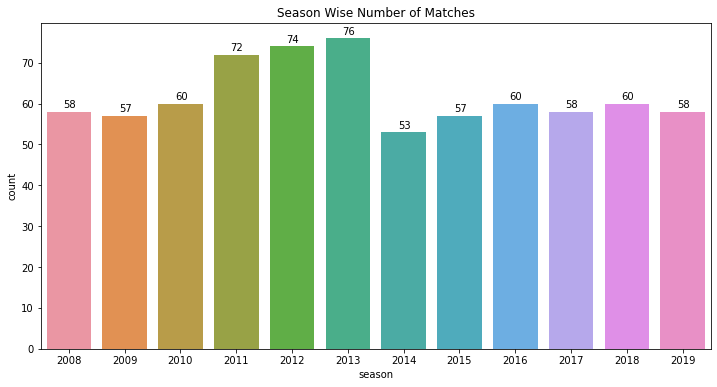

In [21]:
plt.figure(figsize=(12,6))
ax = sns.countplot(df['season'])
plt.title('Season Wise Number of Matches')
for i in ax.patches:
    ax.annotate('{}'.format(i.get_height()),(i.get_x()+0.3,i.get_height()+1),color='black')
plt.show()

- We see that the highest number of matches are played in 2013, followed by 2012 and 2011. 
- The lowest number of matches are played in 2014

- ### City wise number of matches

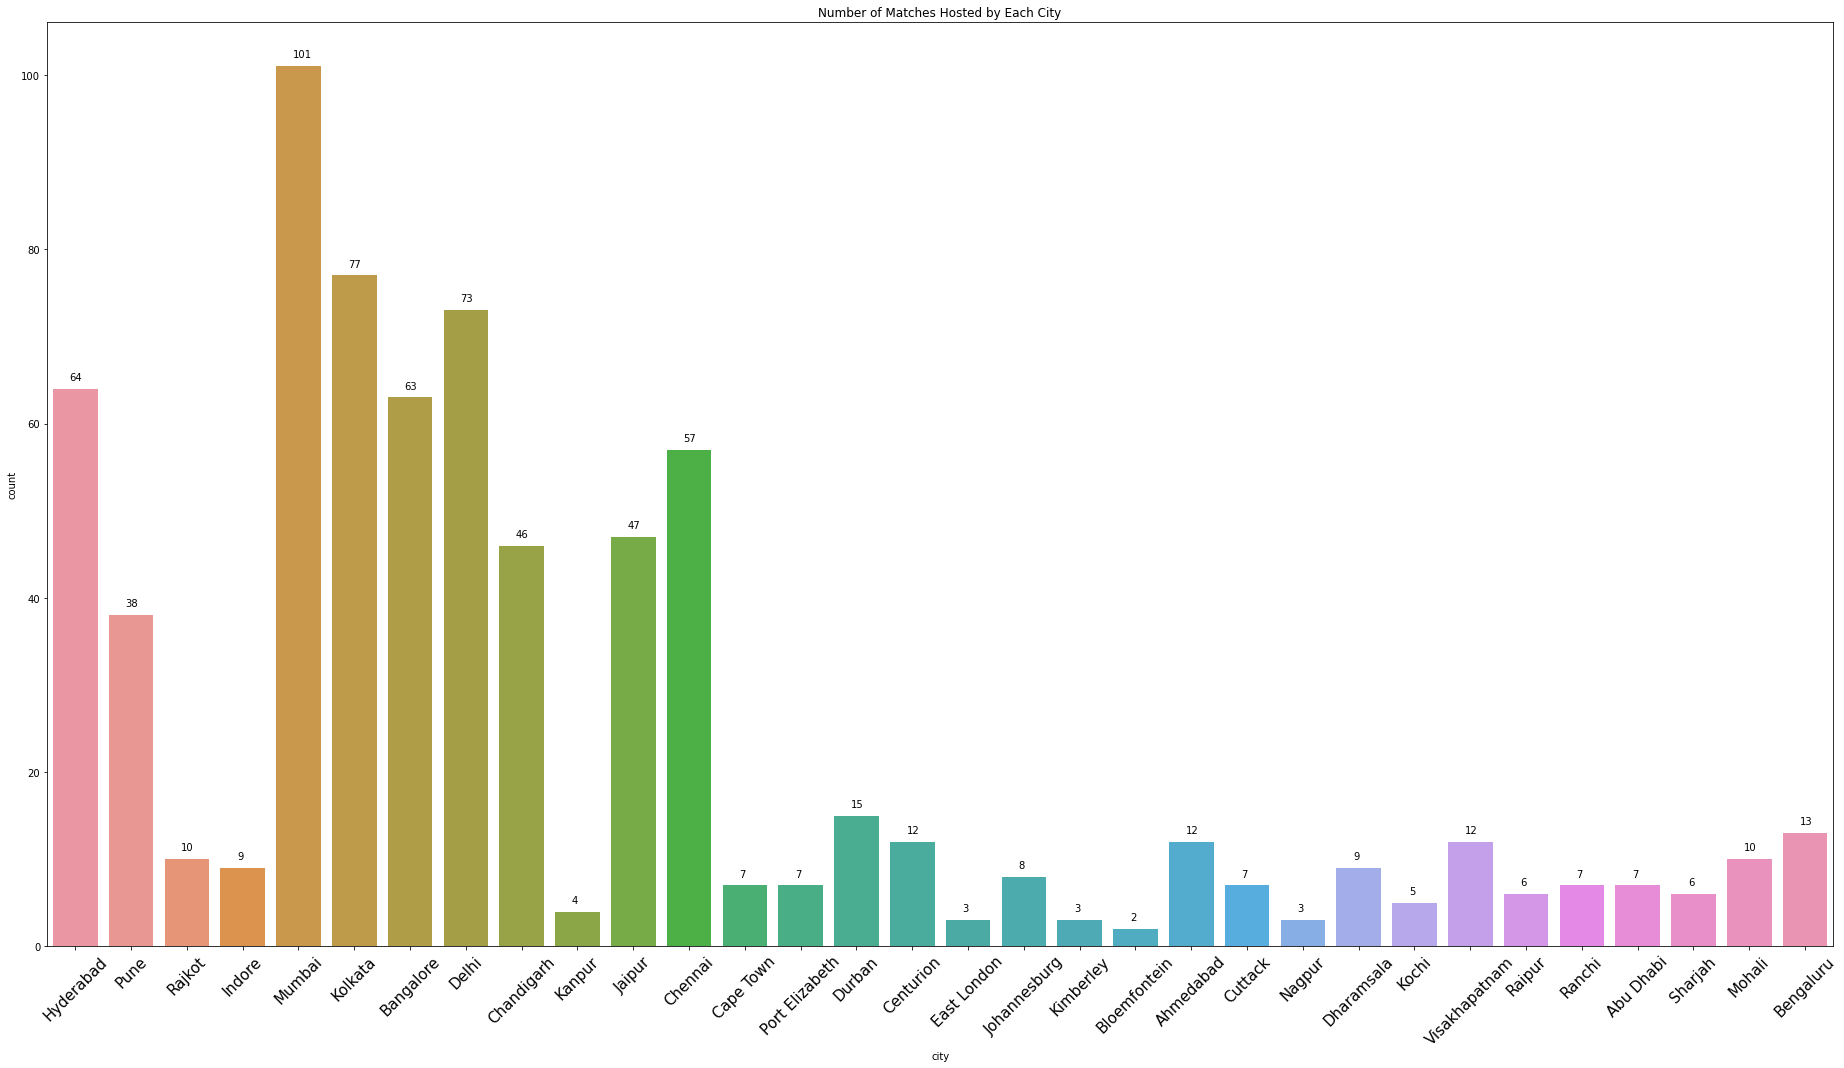

In [22]:
plt.figure(figsize=(32,17))
ax = sns.countplot(df['city'])
plt.title('Number of Matches Hosted by Each City')
plt.xticks(rotation=45,fontsize=15)
for i in ax.patches:
    ax.annotate('{}'.format(i.get_height()),(i.get_x()+0.3,i.get_height()+1),color='black')
plt.show()

- Mumbai hosted the maximum number ofmatches follwed by Kolkata and Delhi.
- Bloemfontein hosted the least number of Mactches.

- ### Teams with toss wins

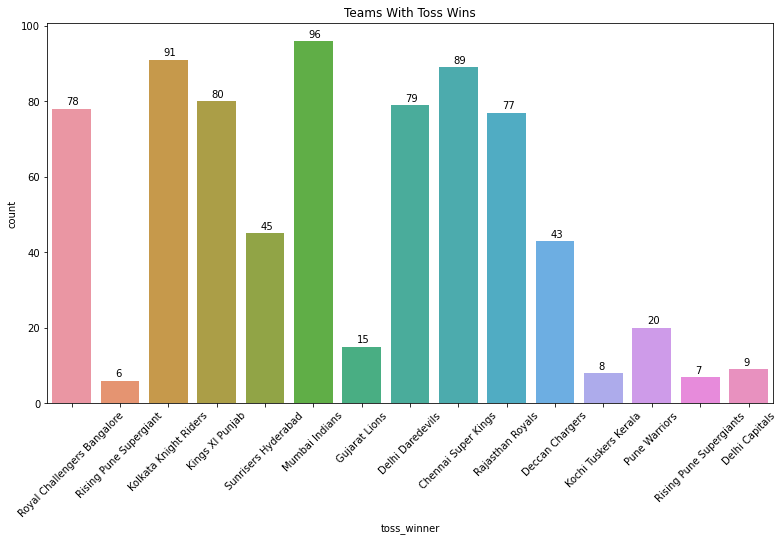

In [28]:
plt.figure(figsize=(13,7))
ax = sns.countplot(df['toss_winner'])
plt.title('Teams With Toss Wins')
plt.xticks(rotation=45,fontsize=10)
for i in ax.patches:
    ax.annotate('{}'.format(i.get_height()),(i.get_x()+0.3,i.get_height()+1),color='black')
plt.show()

- 'Mumbai Indians' has the highest number of toss wins followed by 'Chennai Super Kings' and 'Kolkata Knight Riders'.
- 'Rising Pune Supergiant' has the least number of toss wins.

- ### Teams with wins

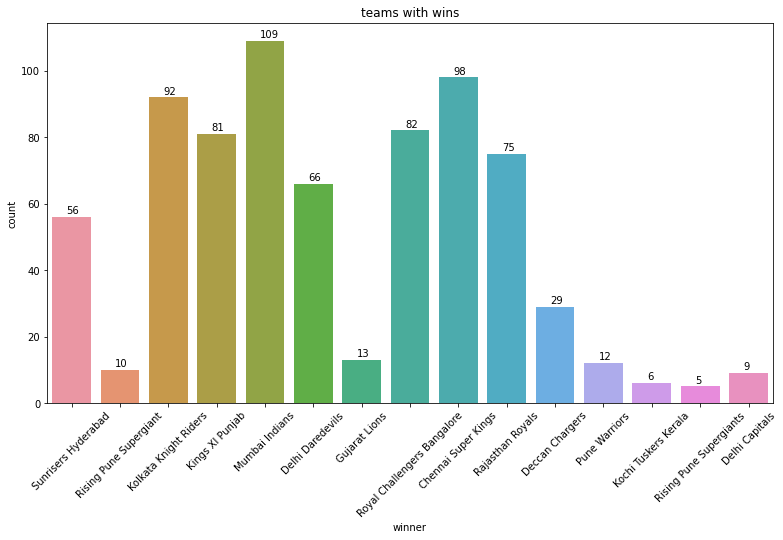

In [29]:
plt.figure(figsize=(13,7))
ax = sns.countplot(df['winner'])
plt.title('teams with wins')
plt.xticks(rotation=45,fontsize=10)
for i in ax.patches:
    ax.annotate('{}'.format(i.get_height()),(i.get_x()+0.3,i.get_height()+1),color='black')
plt.show()

- Mumbai Indians has won the maximum number of matches followed by Chennai Super Kings and Kolkata Knight Riders.
- Rising Pune Suoergiants has the least number of match wins.

- ### Percentage of each player being Player of Match

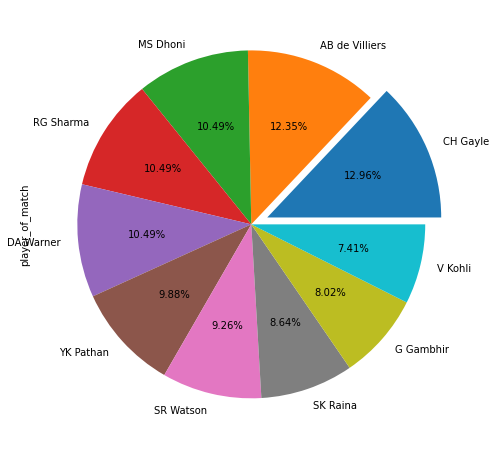

In [31]:
plt.figure(figsize=(13,8))
explode = [0.1,0,0,0,0,0,0,0,0,0]
df['player_of_match'].value_counts().head(10).plot(kind='pie',autopct='%0.2f%%',explode=explode)
plt.show()

- Chris Gayle has become the player of match for the maximum number of times followed by AB de Villers.
- Gautam Gambhir has become player of match for the least number of times. 
- Undoubtedly Chrus Gayle deserves the attention of the companies willing to endorse.

- ### Umpire based analysis

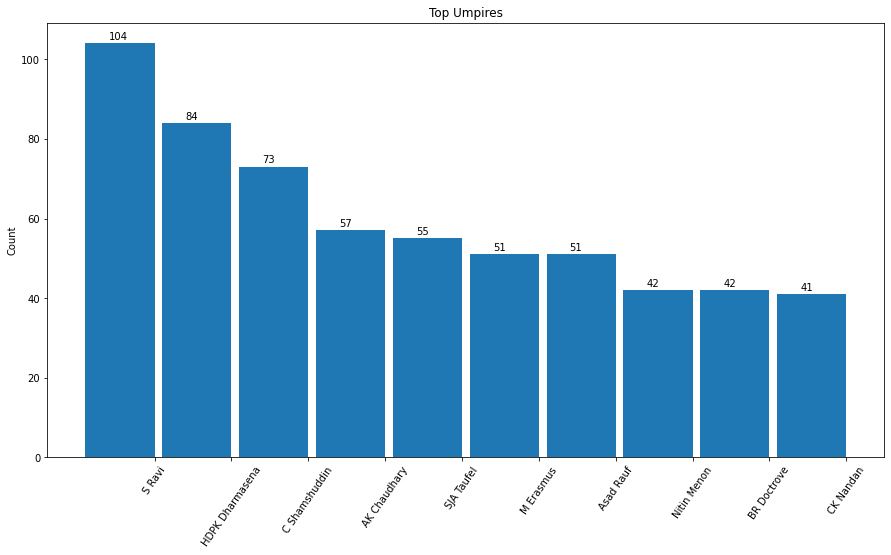

In [33]:
temp_df = pd.melt(df,value_vars=['umpire1', 'umpire2'])
temp_series = temp_df.value.value_counts()[:10]
labels = np.array(temp_series.index)
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_series), width=width,)
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation=55)
ax.set_ylabel("Count")
ax.set_title("Top Umpires")
for i in ax.patches:
    ax.annotate('{}'.format(i.get_height()),(i.get_x()+0.3,i.get_height()+1),color='black')
plt.show()

- S Ravi tops the list with decision making abilities, follwoed by HDPK Dharmasena.

### Annalysing the best among the best team !

In [45]:
#Creating a separate dataframe for all the season champions
champ = df.drop_duplicates(subset=['season'], keep='last')[['season', 'winner']].reset_index(drop=True)
champ.sort_values(by='season')

,season,winner
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad
0,2017,Mumbai Indians


### Teams with wins among the season champions

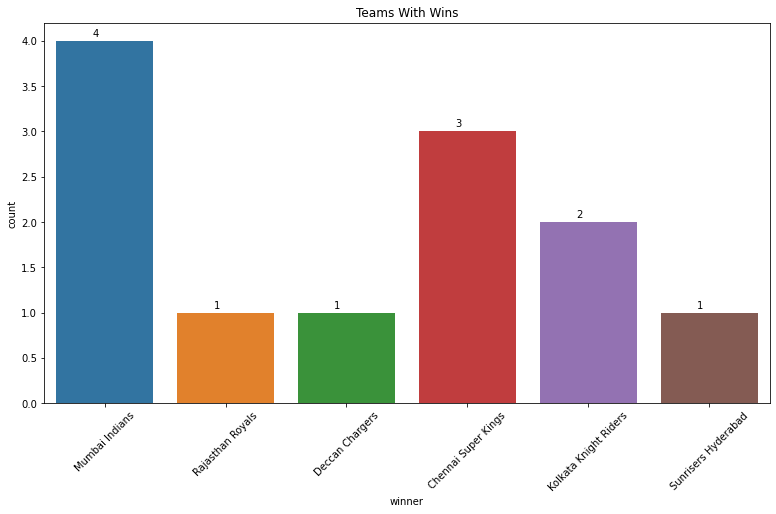

In [36]:
plt.figure(figsize=(13,7))
ax = sns.countplot(champ['winner'])
plt.title('Teams With Wins')
plt.xticks(rotation=45,fontsize=10)
for i in ax.patches:
    ax.annotate('{}'.format(i.get_height()),(i.get_x()+0.3,i.get_height()+0.05),color='black')
plt.show()

- Among all of the season champions, Mumbai Indians tops the list as always. Kuddos to them!!
- Undoubtedly, Mumbai Indians should be own by any company willing to make profit.

### Annalysing the General Tendency of the Teams Who Wins the Toss

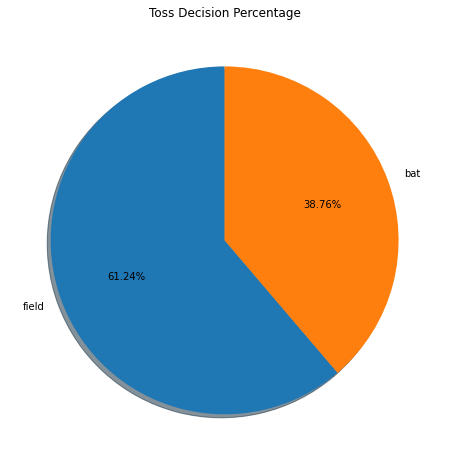

In [38]:
# Teams with wins among the season champions
plt.figure(figsize=(10,8))
toss = df.toss_decision.value_counts()
labels = (np.array(toss.index))
sizes = (np.array((toss / toss.sum())*100))
plt.pie(sizes, labels=labels,
        autopct='%0.2f%%', shadow=True, startangle=90)
plt.title("Toss Decision Percentage")
plt.show()

- The teams who wons the toss, has a general tendency to select fielding instead of batting.

### Annalysing the General Tendency of the Champion Teams of All Seasons Who Wins the Toss

In [4]:
#Creaing a dataframe containing all the 
champ1 = df.drop_duplicates(subset=['season'], keep='last')[['season', 'toss_decision','winner']].reset_index(drop=True)
champ1.sort_values(by='season')

,season,toss_decision,winner
1,2008,field,Rajasthan Royals
2,2009,field,Deccan Chargers
3,2010,bat,Chennai Super Kings
4,2011,bat,Chennai Super Kings
5,2012,bat,Kolkata Knight Riders
6,2013,bat,Mumbai Indians
7,2014,field,Kolkata Knight Riders
8,2015,field,Mumbai Indians
9,2016,bat,Sunrisers Hyderabad
0,2017,bat,Mumbai Indians


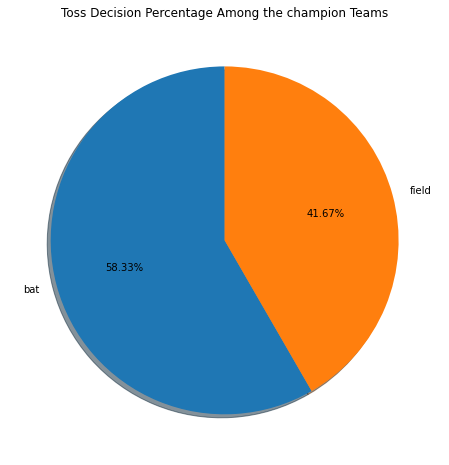

In [6]:
plt.figure(figsize=(10,8))
toss = champ1.toss_decision.value_counts()
labels = (np.array(toss.index))
sizes = (np.array((toss / toss.sum())*100))
plt.pie(sizes, labels=labels,
        autopct='%0.2f%%', shadow=True, startangle=90)
plt.title("Toss Decision Percentage Among the champion Teams")
plt.show()

- The teams which are season champions have also chosen fielding over batting. 

### Seasonal Toss Analysis

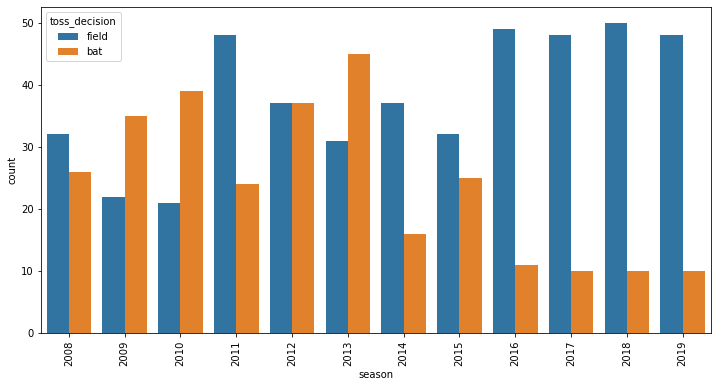

In [49]:
plt.figure(figsize=(12,6))
sns.countplot(x='season', hue='toss_decision', data=df)
plt.xticks(rotation='vertical')
plt.show()

- From 2016 the choice of fielding over batting for the toss winning teams becomes almost a common thing.
- The batting decision tends to detoriates and the team focusses only on fielding after 2013, with 2015 being an exception.

In [50]:
#Importing the data on deliveries of each batsman
df1 = pd.read_csv('deliveries.csv')
df1.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [51]:
#shape of the data
df1.shape

(179078, 21)

- There are 179078 ros and 21 columns in the data.

In [54]:
df1.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

- There are missing values in the data.
- Since we won't be needing those columns, we don't do any operations on them. We simply move forward to our analysis.

### Batsman Anlysis

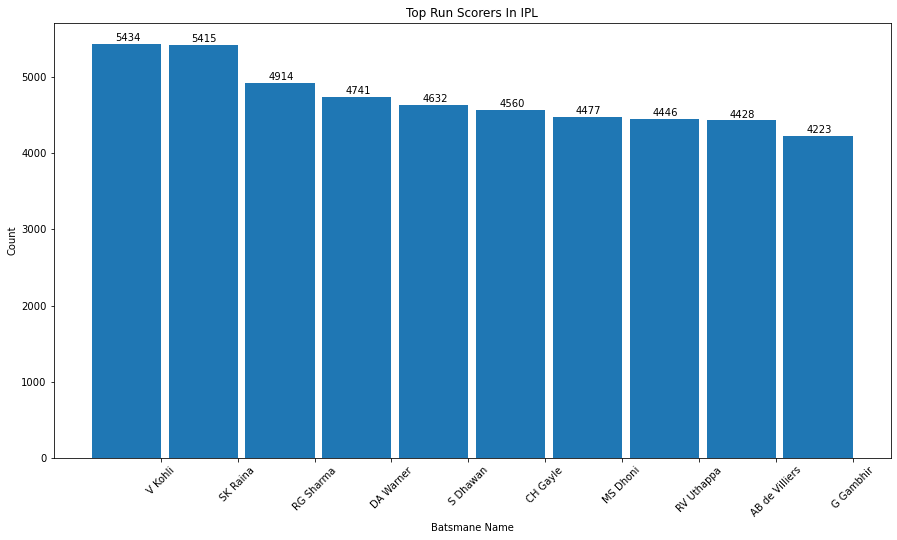

In [56]:
temp_df = df1.groupby('batsman')['batsman_runs'].agg('sum').reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['batsman_runs']), width=width)
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels,rotation=45)
ax.set_ylabel("Count")
ax.set_title("Top Run Scorers In IPL")
ax.set_xlabel('Batsmane Name')
for i in ax.patches:
    ax.annotate('{}'.format(i.get_height()),(i.get_x()+0.3,i.get_height()+40),color='black')
plt.show()

- Without a doubt Virat Kohli is the top run scorer of IPL followed by SK Raina and RG Sharma. 
- Companies should consider hiring themas batsmen if they are willing to.

### Analysis of players with maximum number of boundaries in IPL.

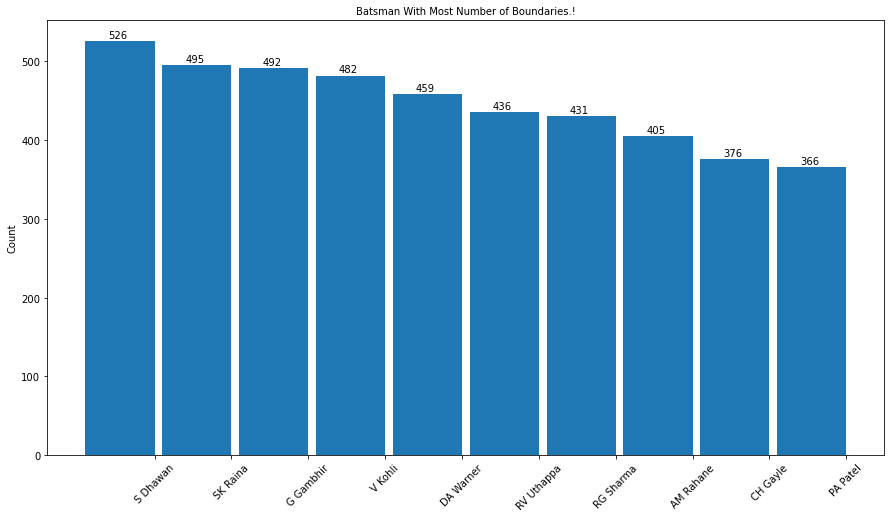

In [58]:
temp_df = df1.groupby('batsman')['batsman_runs'].agg(lambda x: (x==4).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['batsman_runs']), width=width)
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation=45)
ax.set_ylabel("Count")
ax.set_title("Batsman With Most Number of Boundaries.!",fontsize = 10)
for i in ax.patches:
    ax.annotate('{}'.format(i.get_height()),(i.get_x()+0.3,i.get_height()+4),color='black')
plt.show()

- Shikhar Dhavan has taken the maximum number of boundaries in IPL, followed by SK Raina and Gautam Gambhir.

### Now let us see the players with more number of boundaries in IPL.

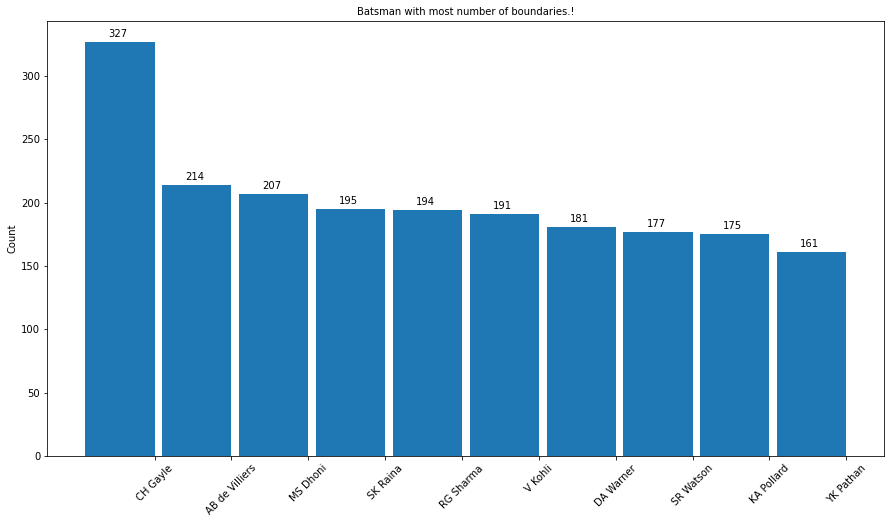

In [59]:
temp_df = df1.groupby('batsman')['batsman_runs'].agg(lambda x: (x==6).sum()).reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['batsman_runs']), width=width)
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation=45)
ax.set_ylabel("Count")
ax.set_title("Batsman with most number of boundaries.!",fontsize = 10)
for i in ax.patches:
    ax.annotate('{}'.format(i.get_height()),(i.get_x()+0.3,i.get_height()+4),color='black')
plt.show()

- Chris Gayle has the highest number of boundaries.
- Boundary man Chris Gayle is gonna rock for the whichever company he is in.

### Bowler Analysis

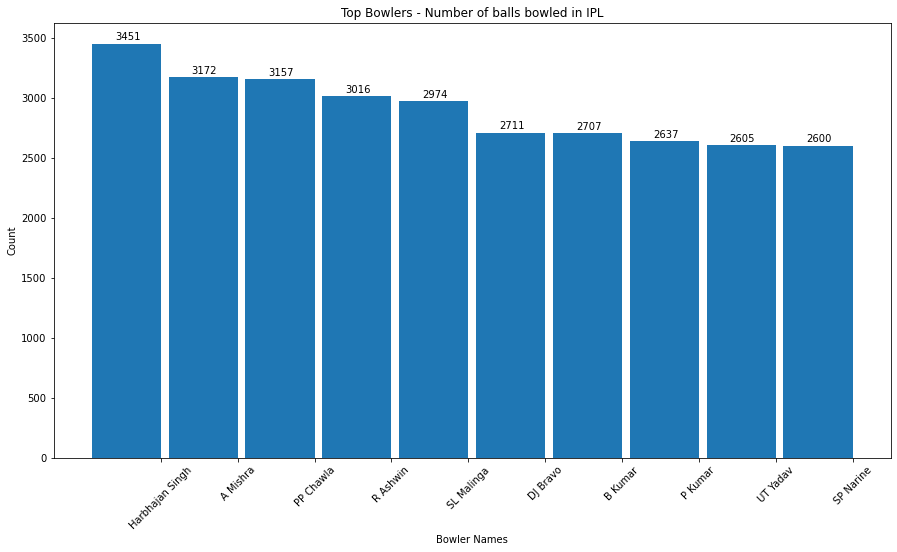

In [60]:
temp_df = df1.groupby('bowler')['ball'].agg('count').reset_index().sort_values(by='ball', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['bowler'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['ball']), width=width)
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation=45)
ax.set_ylabel("Count")
ax.set_title("Top Bowlers - Number of balls bowled in IPL")
ax.set_xlabel('Bowler Names')
for i in ax.patches:
    ax.annotate('{}'.format(i.get_height()),(i.get_x()+0.3,i.get_height()+30),color='black')
plt.show()

- Harbhajan Sigh has bowwled the maximum number of times in IPL., followed by A Mishra.
- For good bowling strategies, companies should consider hiring them.

## Analysis based on the number of dot balls

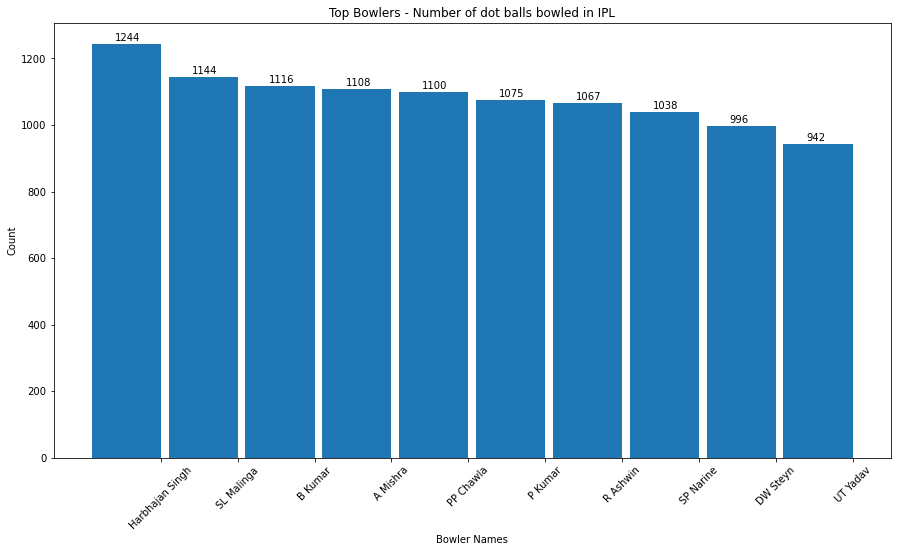

In [61]:
temp_df = df1.groupby('bowler')['total_runs'].agg(lambda x: (x==0).sum()).reset_index().sort_values(by='total_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['bowler'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['total_runs']), width=width)
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation=45)
ax.set_ylabel("Count")
ax.set_title("Top Bowlers - Number of dot balls bowled in IPL")
ax.set_xlabel('Bowler Names')
for i in ax.patches:
    ax.annotate('{}'.format(i.get_height()),(i.get_x()+0.3,i.get_height()+10),color='black')
plt.show()

- Harbhajan Singh has bowled the maximum number of dot balls followed by SL Malinga.

### Analysis on the basis of the number of extras in IPL

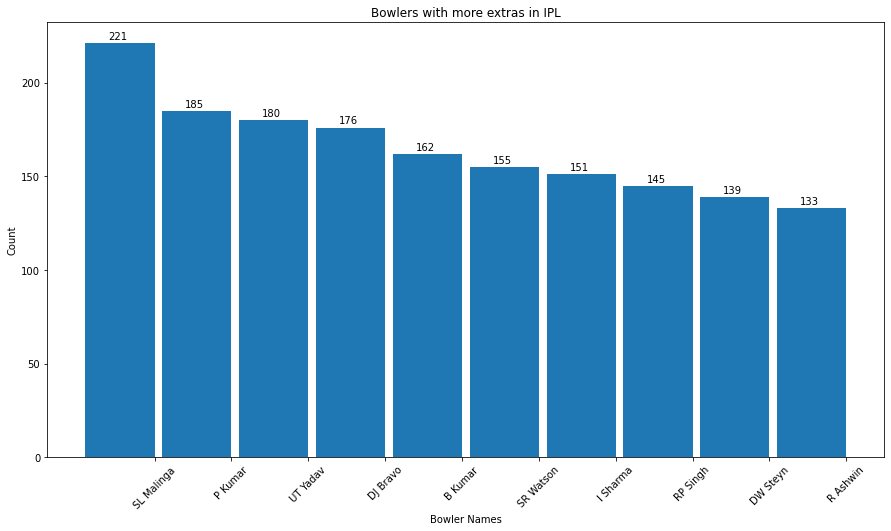

In [63]:
temp_df = df1.groupby('bowler')['extra_runs'].agg(lambda x: (x>0).sum()).reset_index().sort_values(by='extra_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10,:]

labels = np.array(temp_df['bowler'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_df['extra_runs']), width=width)
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation=45)
ax.set_ylabel("Count")
ax.set_title("Bowlers with more extras in IPL")
ax.set_xlabel('Bowler Names')
for i in ax.patches:
    ax.annotate('{}'.format(i.get_height()),(i.get_x()+0.3,i.get_height()+2),color='black')
plt.show()

- SL Malinga has bowled maximum number of extras in IPL followed by P Kumar.